# 1. 기본적인 벡터연산

### 𝐜=[1,3,4,5], 𝐝=[2,4,5,1]

1.1: 3𝐜-8𝐝?

In [1]:
import numpy as np
c = np.array([1,3,4,5])
d = np.array([2,4,5,1])
print(3*c-8*d)


[-13 -23 -28   7]


1.2: 𝐜⋅𝐝?

In [2]:
print(np.dot(c,d))

39


1.3: ‖𝐜‖+‖𝐝‖?

In [3]:
c_sqrt = np.linalg.norm(c)
d_sqrt = np.linalg.norm(d)
c_sqrt+d_sqrt

13.923758411668118

1.4: 𝐜와 𝐝의 각 𝜃의 cos⁡𝜃?

In [4]:
np.dot(c,d)/(c_sqrt*d_sqrt)

0.8051941355399506

# 2. 소리 패턴 분석

In [2]:
## librosa 미설치 시 실행
# !pip install librosa -q

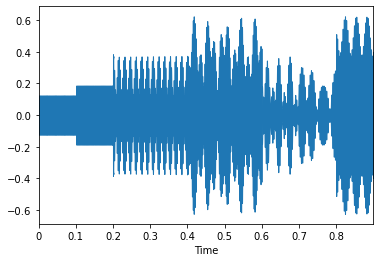

In [3]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import math

fig = plt.figure()
filename = "sound.wav"
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

### BASE = 3옥타브 C = 130.8128Hz
# $  130.8128\times 2^{\frac{k}{12}} $Hz
# cycle = $ 2\pi \times $ BASE $ \times 2^{\frac{k}{12}} $

In [4]:
TIME = np.linspace(0,0.9,len(data))

BASE_CYCLE = 130.8128 ## 3-Octave C*(도)
index2cycle = lambda x : 2*np.pi*BASE_CYCLE*pow(2,x/12)

CYCLE = np.array([index2cycle(i) for i in [0,2,4,5,7,9,11]])  # c_k  도,레,미,파,솔,라,시

In [5]:
def mse(fnc):
    label=data
    error=np.abs(label-fnc(TIME))
    return np.mean(error)*1500

## 여기서부터 함수를 만들면 됩니다.

In [6]:
def func1(x):
    sound = np.zeros(len(x))
    return sound

In [7]:
mse(func1)

266.3281566975367

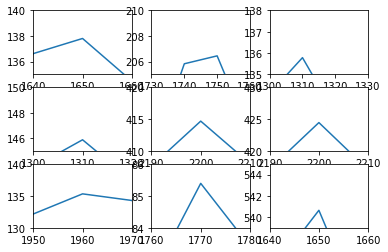

In [13]:
from scipy.io.wavfile import write
test_value = sample_rate

part = len(data)/9 # 함수가 달라지는 구간의 길이

data1 = data[:round(part)]                 # 9개의 함수로 만들기 위해 주어진 소리를 9등분 했습니다.
data2 = data[round(part):round(part)*2]
data3 = data[round(part)*2:round(part)*3]
data4 = data[round(part)*3:round(part)*4]
data5 = data[round(part)*4:round(part)*5]
data6 = data[round(part)*5:round(part)*6]
data7 = data[round(part)*6:round(part)*7]
data8 = data[round(part)*7:round(part)*8]
data9 = data[round(part)*8:round(part)*9]

time1 = np.linspace(len(data1)/sample_rate,len(data1)*2/sample_rate,len(data2)) # time1~3 은 그래프가 정상적으로 나오는지
time2 = np.linspace(len(data1)/sample_rate,len(data1)*2/sample_rate,len(data2)) # 확인하는데 사용했었습니다.
time3 = np.linspace(len(data1)/sample_rate,len(data1)*2/sample_rate,len(data2))

value1 = abs(np.fft.fft(data1,n = sample_rate)) # 구간별 피크값을 찾기 위해 만든 변수입니다.
value2 = abs(np.fft.fft(data2,n = sample_rate))
value3 = abs(np.fft.fft(data3,n = sample_rate))
value4 = abs(np.fft.fft(data4,n = sample_rate))
value5 = abs(np.fft.fft(data5,n = sample_rate))
value6 = abs(np.fft.fft(data6,n = sample_rate))
value7 = abs(np.fft.fft(data7,n = sample_rate))
value8 = abs(np.fft.fft(data8,n = sample_rate))
value9 = abs(np.fft.fft(data9,n = sample_rate))

frequency = np.fft.fftfreq(n=sample_rate,d=0.1/sample_rate) # 주기는 같으므로 1개만 만들었습니다.

# 그래프를 보고 진폭을 구했습니다.
plt.grid()
plt.subplot(331)
plt.xlim(1640,1660)
plt.ylim(135,140)
plt.plot(frequency,value1) # 1650, 138

plt.subplot(332)
plt.xlim(1730,1760)
plt.ylim(205,210)
plt.plot(frequency,value2) # 1750, 206.5

plt.subplot(333)
plt.xlim(1300,1330)
plt.ylim(135,138)
plt.plot(frequency,value3) # 1310, 136

plt.subplot(334)
plt.xlim(1300,1320)
plt.ylim(145,150)
plt.plot(frequency,value4) # 1310, 146

plt.subplot(335)
plt.xlim(2190,2210)
plt.ylim(410,420)
plt.plot(frequency,value5) # 2200, 415

plt.subplot(336)
plt.xlim(2190,2210)
plt.ylim(420,430)
plt.plot(frequency,value6) # 2200, 425

plt.subplot(337)
plt.xlim(1950,1970)
plt.ylim(130,140)
plt.plot(frequency,value7) # 1310, 125 / 1650, 129.5 / 1960, 135

plt.subplot(338)
plt.xlim(1760,1780)
plt.ylim(84,86)
plt.plot(frequency,value8) # 1310, 151.5 / 1640, 149 / 1770, 85.5

plt.subplot(339)
plt.xlim(1640,1660)
plt.ylim(539,545)
plt.plot(frequency,value9) # 1650, 540.5

PI = np.pi
nn = 4700

def func_1():
    sound = 136/nn*np.sin(1650*PI*np.linspace(0,0.1,len(data1))) # nn = 4700
    return sound
def func_2():
    sound = 206.5/nn*np.sin(1750*PI*np.linspace(0,0.1,len(data2))) # nn = 35000
    return sound
def func_3():
    sound = 136/nn*np.sin(1310*PI*np.linspace(0,0.1,len(data3)))
    return sound
def func_4():
    sound = 146/nn*np.sin(1310*PI*np.linspace(0,0.1,len(data4)))
    return sound
def func_5():
    sound = 415/nn*np.sin(2200*PI*np.linspace(0,0.1,len(data5)))
    return sound
def func_6():
    sound = 425/nn*np.sin(2200*PI*np.linspace(0,0.1,len(data6)))
    return sound
def func_7():
    sound = 125/nn*np.sin(1310*PI*np.linspace(0,0.1,len(data7)))+129.5/nn*np.sin(1650*PI*np.linspace(0,0.1,len(data7)))
    +135/nn*np.sin(1960*PI*np.linspace(0,0.1,len(data7)))
    return sound
def func_8():
    sound = 151.5/nn*np.sin(1310*PI*np.linspace(0,0.1,len(data8)))+149/nn*np.sin(1640*PI*np.linspace(0,0.1,len(data8)))
    +85.5/nn*np.sin(1770*PI*np.linspace(0,0.1,len(data8)))
    return sound
def func_9():
    sound = 540.5/nn*np.sin(1650*PI*np.linspace(0,0.1,len(data9)))
    return sound
def func_final(TIME):
    if(TIME <= len(data)/9):
        return func_1()
    elif(TIME<= len(data)*2/9):
        return func_2()
    elif(TIME<= len(data)*3/9):
        return func_3()
    elif(TIME<= len(data)*4/9):
        return func_4()
    elif(TIME<= len(data)*5/9):
        return func_5()
    elif(TIME<= len(data)*6/9):
        return func_6()
    elif(TIME<= len(data)*7/9):
        return func_7()
    elif(TIME<= len(data)*8/9):
        return func_8()
    elif(TIME<= len(data)):
        return func_9()

wav1 = 'wav1.wav'
write(wav1,22050,(4096*func_1()).astype(np.int16))

testdata,testsample_rate = librosa.load(wav1)
#librosa.display.waveplot(testdata,sr=testsample_rate)

# test함수는 각 구간별 함수가 제대로 만들어졌는지 확인하기 위해 만들었습니다.
def test(fnc):
    label=data7
    error=np.abs(label-fnc())
    return np.mean(error)*1500

# mse(func_final) 실행이 안되서 아래 func1로 제출하겠습니다.


In [10]:
mse(func1) # 제가 구현하려고 했는데 정상 작동이 안되는 것 같습니다.

266.3281566975367

In [11]:
'''
고찰

처음엔 강의자료로 올라온 자료들과 그 방법으로 풀어보려고 했었습니다. 그런데 읽어도 어떻게 구현해야할 방법을 못찾아서 이전 과제에
사용했던 방법을 구간을 나눠서 적용하고 만들어진 함수들을 합칠 때 새로운 함수에 파라미터값에 따라 구간별로 다른 따로 만들었던 함수들을
반환하게 해서 각각의 함수들을 이어붙인것과 비슷하게 만들려고 했습니다. 생각했던대로 함수들을 만들긴 했는데 결과는
생각과 다르게 나왔습니다... 

'''

SyntaxError: invalid syntax (<ipython-input-11-cac955b4d008>, line 3)